In [1]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [5]:
print('Name: ', '*' * 30)
print(src.name)
print('Mode: ', '*' * 30)
print(src.mode)
print('Meta: ', '*' * 30)
print(src.meta)

print(src.crs)

print(src.res)

print(src.width)

print(src.height)

print(src.bounds)

Name:  ******************************
https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
Mode:  ******************************
r
Meta:  ******************************
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transf

## Plotting Raster Data
Rasterio can easily integrate with matplotlib for raster visualization. The rasterio.plot.show() function is the simplest way to display a raster image, and by default, it shows the first band of the raster.

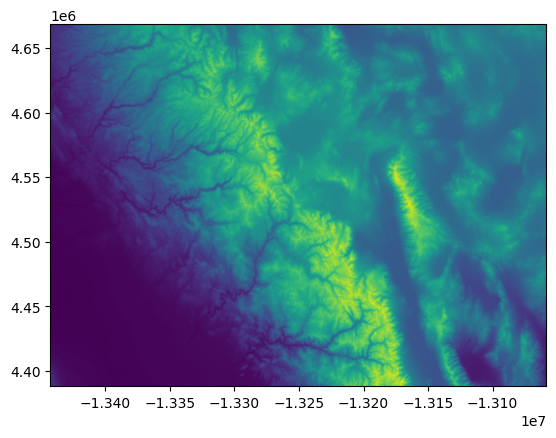

<Axes: >

In [6]:
rasterio.plot.show(src)

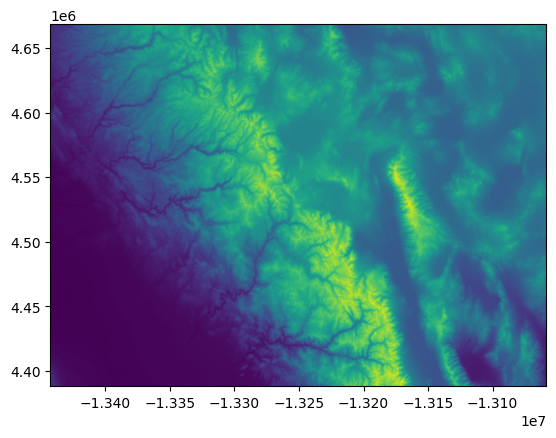

<Axes: >

In [7]:
rasterio.plot.show((src, 1))

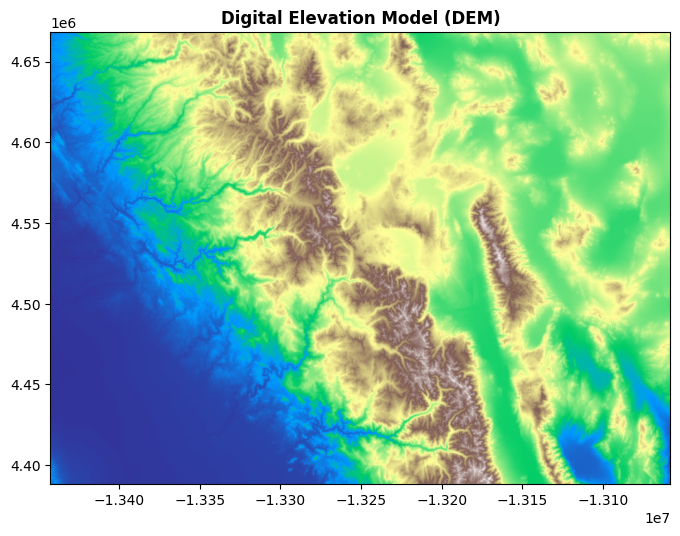

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

In [9]:
dem_bounds = (
    "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
)
gdf = gpd.read_file(dem_bounds)
gdf = gdf.to_crs(src.crs)

<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

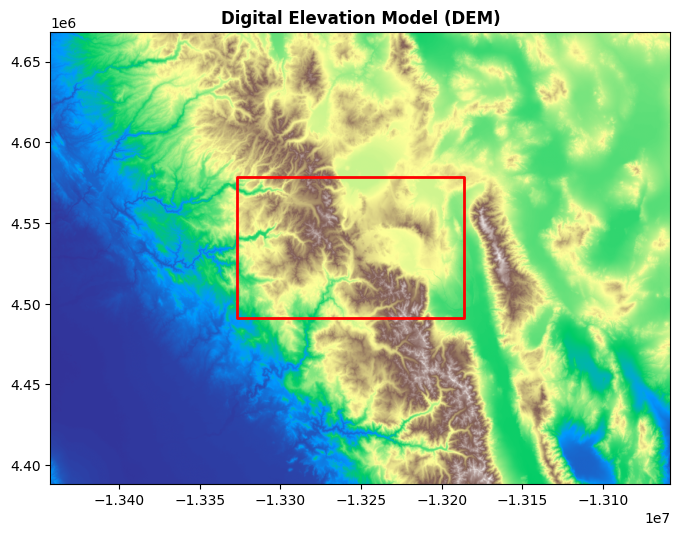

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)